# 学習曲線と検証曲線

* 学習曲線を使ってバイアスとバリアンすの問題を診断する

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
import numpy as np

# データセットの読み込み
data = load_breast_cancer()

# 特徴量
X = data.data          # NumPy配列（shape: [n_samples, n_features]）
# ラベル（0: 悪性, 1: 良性）
y = data.target # LabelEncoder使う必要なし

from sklearn.model_selection import train_test_split
# データセットを訓練用とテスト用に分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

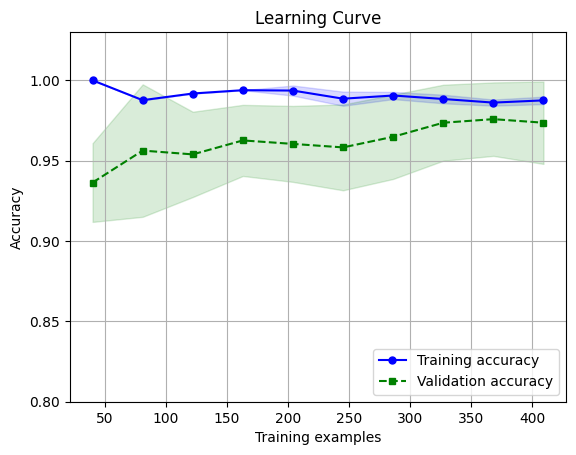

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve

pipe_lr = make_pipeline(
    StandardScaler(),
    LogisticRegression(penalty='l2',max_iter=1000, random_state=1)
)

# learning_curve関数で交差検証による正解率を算出
train_sizes, train_scores, test_scores = learning_curve(
    pipe_lr,
    X_train,
    y_train,
    cv=10,
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy'
)

# 平均と標準偏差を計算
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, color='blue', alpha=0.15)
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, color='green', alpha=0.15)
plt.grid()
plt.xlabel('Training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.title('Learning Curve')
plt.show()

* 検証曲線を使って過学習と学習不足を明らかにする

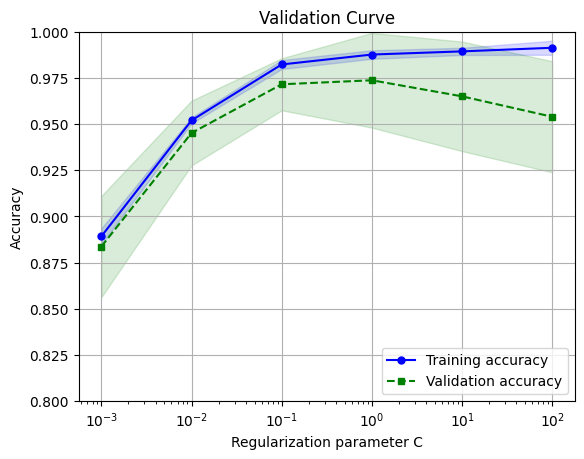

In [4]:
from sklearn.model_selection import validation_curve
# validation_curve関数で正則化パラメータCの値を変化させて交差検証による正解率を算出
param_range = [0.001, 0.01, 0.1, 1, 10, 100]
train_scores, test_scores = validation_curve(
    estimator=pipe_lr,
    X=X_train,
    y=y_train,
    param_name='logisticregression__C',
    param_range=param_range,
    cv=10,
)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, color='blue', alpha=0.15)
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, color='green', alpha=0.15)
plt.xscale('log')
plt.grid()
plt.xlabel('Regularization parameter C')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.title('Validation Curve')
plt.show()